# Your Final Project Title

- member 1: Zekai Wu
- member 2: Ian Huang
- member 3: Amitha Bhat
- member 4: Fai
- member 5: Nayeon

### Introduction

##### This  project is looks at the topics and themes discussed in a collection of COVID-19 tweets. 

Topic Modeling Section

In [2]:
import pandas as pd

In [3]:
df_1_to_3798 = pd.read_csv('Corona_NLP_test2.csv')
df_1_to_3798.dropna(inplace=True)
df_1_to_3798.drop_duplicates(inplace=True)
df_1_to_3798

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
...,...,...,...,...,...,...
3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral


In [4]:
df_3799_to_44955 = pd.read_csv('Corona_NLP_train.csv')
df_3799_to_44955.dropna(inplace=True)
df_3799_to_44955.drop_duplicates(inplace=True)
df_3799_to_44955

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃœT: 36.319708,-82.363649",16-03-2020,As news of the regionÂ’s first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂ’all really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂ’d be in a situation &amp; wor...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [5]:
merged_df = pd.concat([df_1_to_3798, df_3799_to_44955], ignore_index=True)

In [6]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import re
import nltk
from nltk.corpus import stopwords

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove RT (retweet sign)
    text = re.sub(r'rt[\s]+', '', text)
    # Remove mentions
    text = re.sub(r'@\S+', '', text)
    # Remove all non-alphabetic characters
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Remove stopwords and do stemming
    # text = " ".join([stemmer.stem(i) for i in text.split() if i not in stop_words])
    return text

merged_df['Text_Cleaned'] = merged_df['OriginalTweet'].apply(preprocess_text)

In [10]:
merged_df[['Text_Cleaned','OriginalTweet']]

,Text_Cleaned,OriginalTweet
0,trending new yorkers encounter empty supermar...,TRENDING: New Yorkers encounter empty supermar...
1,when couldn find hand sanitizer at fred meyer ...,When I couldn't find hand sanitizer at Fred Me...
2,panic buying hits newyork city as anxious sho...,#Panic buying hits #NewYork City as anxious sh...
3,toiletpaper dunnypaper coronavirus coronavi...,#toiletpaper #dunnypaper #coronavirus #coronav...
4,do you remember the last time you paid 2 99 g...,Do you remember the last time you paid $2.99 a...
...,...,...
35526,yâ all really shitting that much more at home ...,YÂ’all really shitting that much more at home?...
35527,still shocked by the number of toronto superm...,Still shocked by the number of #Toronto superm...
35528,i never that weâ be in situation amp world t...,I never that weÂ’d be in a situation &amp; wor...
35529,airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...


In [11]:
documents = merged_df['Text_Cleaned']

In [12]:
count_vectorizer = CountVectorizer(stop_words='english')

In [13]:
count_data = count_vectorizer.fit_transform(documents)

In [14]:
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 9

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [15]:
count_vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ã¼berweist', 'ã¼retime', 'ãšsteckã'],
      dtype=object)

In [16]:
words = list(count_vectorizer.get_feature_names_out())
words

['00',
 '000',
 '0000',
 '0000009375',
 '0000hrs',
 '000162',
 '00042',
 '000cr',
 '000francs',
 '000pcs',
 '000s',
 '000th',
 '000x',
 '000â',
 '0010',
 '0016',
 '0025450557',
 '0026691661',
 '005',
 '008',
 '0095',
 '00am',
 '00hrs',
 '00pm',
 '00â',
 '01',
 '010',
 '0101',
 '011',
 '0113',
 '0121',
 '01236',
 '01273',
 '013',
 '0131',
 '01392576476',
 '014',
 '01449',
 '0147',
 '01474',
 '0169061211',
 '01765',
 '017â',
 '01892',
 '01952',
 '01hr',
 '01kg',
 '02',
 '020',
 '0200hrs',
 '0202628233',
 '0202779000',
 '0203',
 '021',
 '02268443322',
 '023',
 '027',
 '0274',
 '028',
 '02920',
 '03',
 '0300',
 '03031239999',
 '03065659733',
 '0330',
 '03338819977',
 '03344859556',
 '0337210852',
 '034',
 '0344',
 '0345',
 '03454',
 '0351',
 '038',
 '03hrs',
 '03pm',
 '04',
 '041',
 '043',
 '0469315906',
 '047',
 '05',
 '0508',
 '051',
 '0541296',
 '0545',
 '0558234767',
 '057',
 '059',
 '06',
 '0600',
 '0618',
 '0645',
 '066',
 '07',
 '0700',
 '07002255226',
 '07063501522',
 '0707',
 '071

In [17]:
lda.components_.shape

(5, 43998)

In [18]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_words)


Topic #1:
coronavirus store supermarket grocery people food covid_19 covid19 panic

Topic #2:
19 covid consumer coronavirus food pandemic online covid19 shopping

Topic #3:
prices coronavirus 19 covid amp food demand market stock

Topic #4:
workers 19 covid coronavirus amp supermarket store online grocery

Topic #5:
prices coronavirus sanitizer hand oil 19 covid covid19 masks



Topic #1: This topic seems to be related to grocery stores during the COVID-19 pandemic. It mentions terms like "store," "grocery," "coronavirus," "supermarket," "sanitizer," and "workers." It suggests that people might be concerned about the availability of essential supplies and the safety of workers in grocery stores during the pandemic.

Topic #2: This topic appears to be about online shopping during the COVID-19 pandemic. It includes terms like "online," "shopping," "COVID-19," "supermarket," "delivery," and "time." It indicates that people might have shifted towards online shopping for groceries and other goods due to the pandemic.

Topic #3: This topic relates to consumer behavior and the impact of the COVID-19 pandemic. It mentions terms like "consumer," "COVID-19," "coronavirus," "pandemic," "COVID19," and "crisis." It suggests that the pandemic has influenced consumer habits, preferences, and the overall consumer market.

Topic #4: This topic is related to the impact of COVID-19 on prices, particularly in the context of oil and gas. It mentions terms like "coronavirus," "oil," "COVID-19," "gas," and "price." It indicates that the pandemic has had an effect on global oil and gas prices.

Topic #5: This topic appears to be about the panic buying and stockpiling of food during the COVID-19 pandemic. It includes terms like "food," "coronavirus," "COVID-19," "panic," "stock," and "buying." It suggests that people might have been concerned about shortages and engaged in panic buying behavior.

These topics provide a glimpse into the main themes or patterns present in the analyzed text data. By analyzing the top words within each topic, you can gain insights into the main concerns, trends, and discussions surrounding COVID-19 in the context of grocery stores, online shopping, consumer behavior, price impacts, and panic buying.

In [19]:
!pip install bokeh

  Using cached bokeh-3.1.1-py3-none-any.whl (8.3 MB)
  Using cached xyzservices-2023.5.0-py3-none-any.whl (56 kB)


In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.manifold import TSNE

In [21]:
# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda.transform(count_data)):
    topic_weights.append([w for i, w in enumerate(row_list)])

In [22]:
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

In [23]:
# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

In [24]:
# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

In [25]:
# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35292 samples in 0.092s...
[t-SNE] Computed neighbors for 35292 samples in 1.525s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35292
[t-SNE] Computed conditional probabilities for sample 2000 / 35292
[t-SNE] Computed conditional probabilities for sample 3000 / 35292
[t-SNE] Computed conditional probabilities for sample 4000 / 35292
[t-SNE] Computed conditional probabilities for sample 5000 / 35292
[t-SNE] Computed conditional probabilities for sample 6000 / 35292
[t-SNE] Computed conditional probabilities for sample 7000 / 35292
[t-SNE] Computed conditional probabilities for sample 8000 / 35292
[t-SNE] Computed conditional probabilities for sample 9000 / 35292
[t-SNE] Computed conditional probabilities for sample 10000 / 35292
[t-SNE] Computed conditional probabilities for sample 11000 / 35292
[t-SNE] Computed conditional probabilities for sample 12000 / 35292
[t-SNE] Computed conditional probabilities for sam

In [26]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [27]:
# Plot the Topic Clusters using Bokeh
output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(number_topics), 
              width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

### Topic Modeling Section Ends

In [28]:
merged_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text_Cleaned
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,when couldn find hand sanitizer at fred meyer ...
2,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious sho...
3,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavi...
4,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,do you remember the last time you paid 2 99 g...
...,...,...,...,...,...,...,...
35526,44946,89898,"Brooklyn, NY",14-04-2020,YÂ’all really shitting that much more at home?...,Negative,yâ all really shitting that much more at home ...
35527,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shocked by the number of toronto superm...
35528,44949,89901,OHIO,14-04-2020,I never that weÂ’d be in a situation &amp; wor...,Positive,i never that weâ be in situation amp world t...
35529,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...


## End of Topic Modeling

## Sentiment Analysis

In [29]:
!pip install nltk 
!pip install -U textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [30]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

In [31]:
def get_sentiment_textblob(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

In [32]:
def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [34]:
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [35]:
merged_df['sentiment_textblob'] = merged_df['Text_Cleaned'].apply(get_sentiment_textblob)
merged_df['sent_textblob_cont'] = merged_df['Text_Cleaned'].apply(get_sent_textblob_cont)
merged_df['sentiment_vader'] = merged_df['Text_Cleaned'].apply(get_sentiment_vader)
merged_df['sent_vader_cont'] = merged_df['Text_Cleaned'].apply(get_sent_vader_cont)

In [36]:
merged_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text_Cleaned,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermar...,Positive,0.018182,Negative,-0.6705
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,when couldn find hand sanitizer at fred meyer ...,Neutral,0.000000,Positive,0.3506
2,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious sho...,Positive,0.050000,Negative,-0.6486
3,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavi...,Negative,-0.016667,Neutral,0.0000
4,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,do you remember the last time you paid 2 99 g...,Negative,-0.051852,Neutral,0.0000


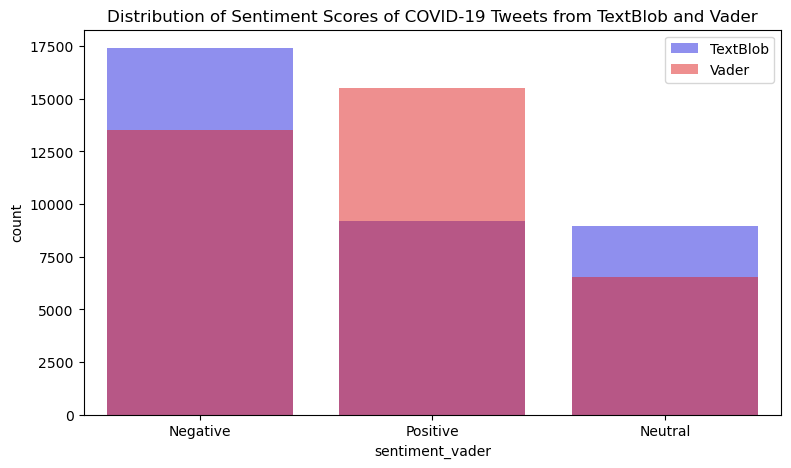

In [ ]:
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.countplot(x="sentiment_textblob", data=merged_df, label="TextBlob", color='blue', alpha=0.5)
sns.countplot(x="sentiment_vader", data=merged_df, label="Vader", color='red', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores of COVID-19 Tweets from TextBlob and Vader')
plt.show()

/tmp/ipykernel_55/3898652473.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['TweetAt'] = pd.to_datetime(merged_df['TweetAt'])


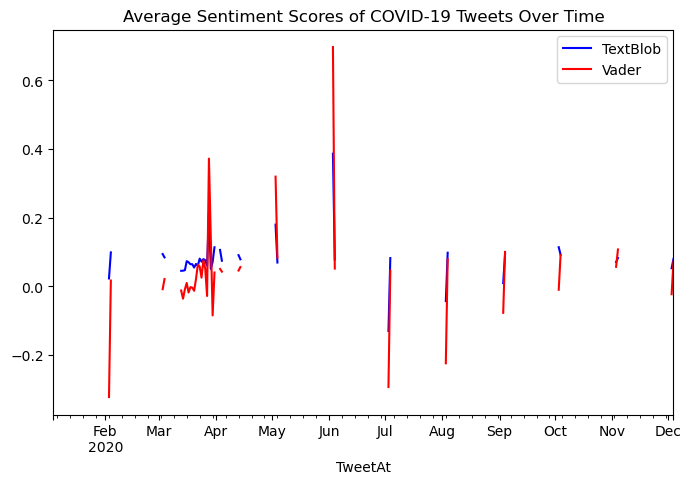

In [ ]:
merged_df['TweetAt'] = pd.to_datetime(merged_df['TweetAt'])

plt.figure(figsize=(8, 5))
merged_df.resample('D', on='TweetAt')['sent_textblob_cont'].mean().plot(label="TextBlob", color='blue')
merged_df.resample('D', on='TweetAt')['sent_vader_cont'].mean().plot(label="Vader", color='red')
plt.legend()
plt.title('Average Sentiment Scores of COVID-19 Tweets Over Time')
plt.show()

## End of Sentiment Analysis

## Start of Statistical Analysis ##

### Summary Statistics ###

### Description of Dataset ###
#### This is a dataset outlining tweets from March 2020, about COVID-19. It showcases the tweets' username, text, and location (amongst other details). ####

In [ ]:
print(merged_df.describe())

           UserName    ScreenName  sent_textblob_cont  sent_vader_cont
count  35531.000000  35531.000000        35531.000000     35531.000000
mean   22540.195097  67492.195097            0.072805         0.033036
std    12986.950291  12986.950291            0.230782         0.496324
min        1.000000  44953.000000           -1.000000        -0.983500
25%    11162.500000  56114.500000           -0.002917        -0.350600
50%    22682.000000  67634.000000            0.000000         0.000000
75%    33807.500000  78759.500000            0.200000         0.440400
max    44955.000000  89907.000000            1.000000         0.984300


In [40]:
merged_df.columns 

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Text_Cleaned', 'sentiment_textblob', 'sent_textblob_cont',
       'sentiment_vader', 'sent_vader_cont'],
      dtype='object')

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 


### Textblob Sentiment Visualizations ###

<Axes: xlabel='sent_textblob_cont', ylabel='Count'>

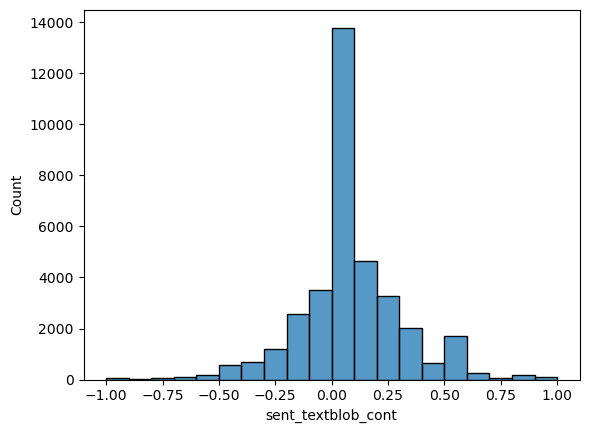

In [42]:
sns.histplot(data=merged_df, x="sent_textblob_cont", bins=20)

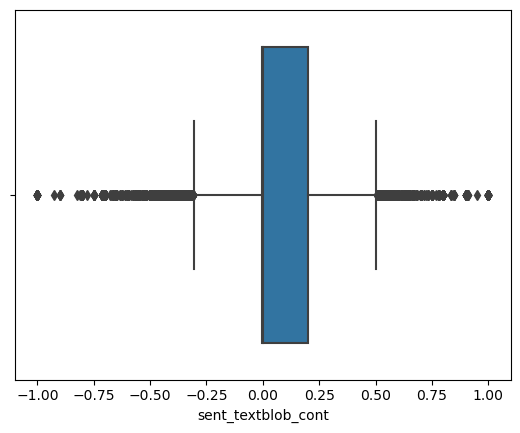

In [44]:
sns.boxplot(data=merged_df, x="sent_textblob_cont")
plt.show()

### Vader Sentiment Visualizations ###

<Axes: xlabel='sent_vader_cont', ylabel='Count'>

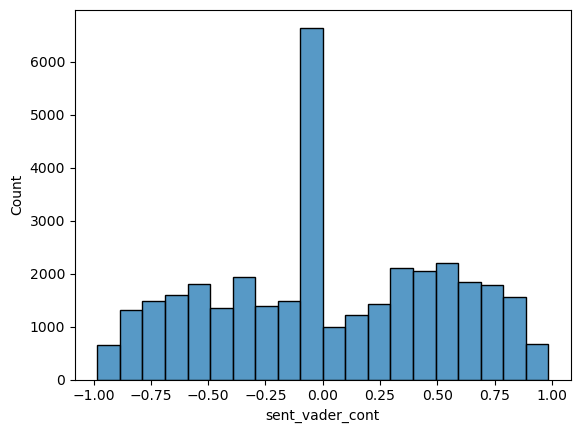

In [43]:
sns.histplot(data=merged_df, x="sent_vader_cont", bins=20)

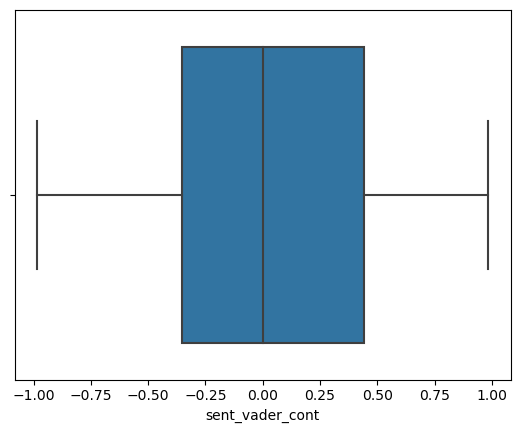

In [45]:
sns.boxplot(data=merged_df, x="sent_vader_cont")
plt.show()

### Correlation Matrix ###

/tmp/ipykernel_55/3207616181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=merged_df.corr()


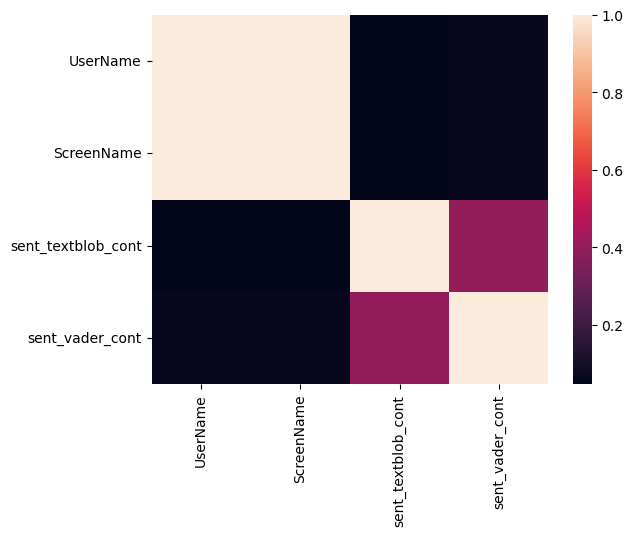

In [47]:
correlation_matrix=merged_df.corr()
sns.heatmap(correlation_matrix)
plt.show()